<a href="https://colab.research.google.com/github/b00kkk/US_President_Election_2024/blob/main/tweet_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
trump_tweet=pd.read_csv("trump_tweet.csv")
harris_tweet=pd.read_csv("harris_tweet.csv")

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly. validators.scatter.marker import SymbolValidator
from wordcloud import WordCloud

In [9]:
tt_text=[]
ht_text=[]

vector_tt = CountVectorizer()
vector_ht = CountVectorizer()

# 문장 단위의 코퍼스를 전체 문장으로 결합
tt_text.append(' '.join(trump_tweet['text']))
ht_text.append(' '.join([str(text) for text in harris_tweet['text']]))

# 문서가 1개 짜리인 단어 콜랙션 만들기
ttt=vector_tt.fit_transform(tt_text)
htt=vector_ht.fit_transform(ht_text)

tt=pd.DataFrame(ttt.toarray(), columns=vector_tt.get_feature_names_out()).T
ht=pd.DataFrame(htt.toarray(), columns=vector_ht.get_feature_names_out()).T

tt.rename(columns={0:'frequency'}, inplace=True)
ht.rename(columns={0:'frequency'}, inplace=True)

tt=tt.to_dict()
ht=ht.to_dict()

In [12]:
import numpy as np
from PIL import Image
trump_mask = np.array(Image.open("trump.jpg"))
harris_mask = np.array(Image.open("harris.png"))

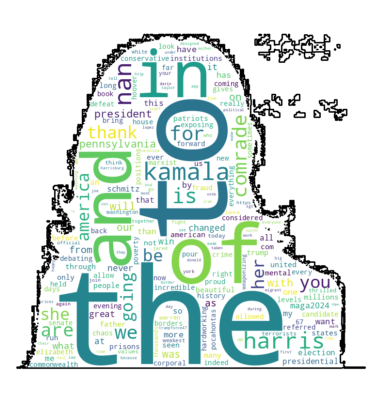

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)

# 워드클라우드 생성
wordcloud = WordCloud(
    stopwords=stopwords,
    width=800,
    height=400,
    contour_width=2,
    background_color='white',
    mask=harris_mask
).generate_from_frequencies(ht['frequency'])

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

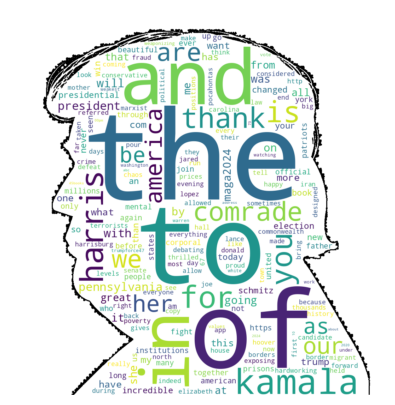

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)

# 워드클라우드 생성
wordcloud = WordCloud(
    stopwords=stopwords,
    width=800,
    height=400,
    contour_width=2,
    background_color='white',
    mask=trump_mask
).generate_from_frequencies(tt['frequency'])

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()